### Boston Dataset using Linear Regression

### IMPORTING LIBRARIES

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [109]:
sns.set(rc={'figure.figsize':(12.75,7.25)})

### DATA PREPROCESSING

In [110]:
data=load_boston()
features=pd.DataFrame(data=data.data,columns=data.feature_names)
target=pd.DataFrame(data=data.target, columns=['target'])

In [111]:
boston=pd.concat([features,target],axis=1)

In [112]:
print('Boston DataFrame Info')
boston.info()

Boston DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [113]:
print('Boston DataFrame first 5 rows')
boston.head()

Boston DataFrame first 5 rows


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [114]:
print('NaN values')
boston.isna().sum()

NaN values


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

### CORRELATION MATRIX

In [115]:
corr_matrix=boston.corr()
print('Correlation matrix')
print(corr_matrix)

Correlation matrix
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -

### VISUALIZING THE CORRELATION OF FEATURES WITH TARGET

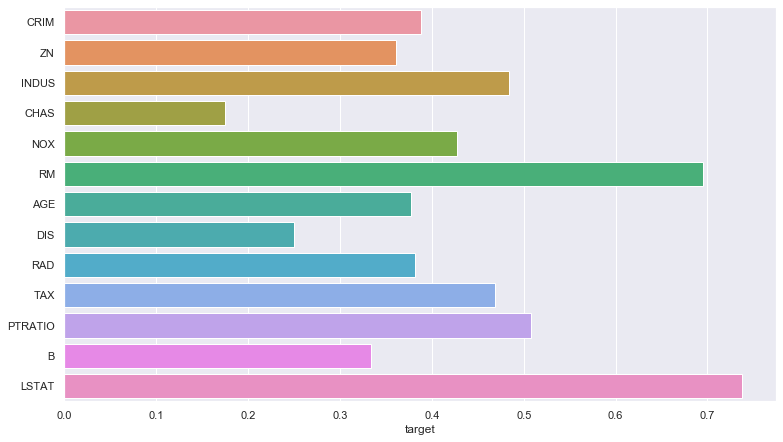

In [116]:
corr_matrix.drop('target',axis=0,inplace=True)
corr_matrix['target']=abs(corr_matrix['target'])
sns.barplot(y=corr_matrix.index,x=corr_matrix['target']);

### SPLITTING THE DATASET TO FEATURES (INPUT VARIABLES) AND TARGET (OUTPUT VARIABLE)

In [117]:
x=boston.drop(['target','CHAS'],axis=1) #Since CHAS isn't as correlated to target as compared to others 
# =============================================================================
# #TO ADD POLYNOMIAL FEATURES IN REGRESSION
# poly=PolynomialFeatures(degree=2)
# x=poly.fit_transform(x)
# =============================================================================
y=boston['target']

### SPLITTING UP THE DATASET TO TRAIN AND TEST SET

In [118]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=3)

### SCALING THE DATASETS USING MINMAXSCALER

In [119]:
scalerTrain=MinMaxScaler().fit(train_x)
train_x_scaled=scalerTrain.transform(train_x)
test_x_scaled=scalerTrain.transform(test_x) #Scaling test set wrt train set

train_y=train_y.values.reshape(-1,1)
test_y=test_y.values.reshape(-1,1)

scalerTest=MinMaxScaler().fit(train_y)
train_y_scaled=scalerTest.transform(train_y)
test_y_scaled=scalerTest.transform(test_y) #Scaling test set wrt train set

### LINEAR REGRESSION MODEL

In [120]:
linearReg=LinearRegression(fit_intercept=True)
model=linearReg.fit(train_x_scaled,train_y_scaled)

### R-SQUARED VALUE ON TRAIN AND TEST SET

In [121]:
r2_train=model.score(train_x_scaled,train_y_scaled)
print("R Squared value for train data: ",r2_train)
r2_test=model.score(test_x_scaled,test_y_scaled)
print("R Squared value for test data: ",r2_test)

R Squared value for train data:  0.7203497579766608
R Squared value for test data:  0.7731110845563153


### PREDICTING THE TARGET VALUE USING TEST SET

In [122]:
predict_y=model.predict(test_x_scaled)

### RMSE VALUE

In [123]:
mse=mean_squared_error(test_y_scaled,predict_y)
rmse=np.sqrt(mse)
print('RMSE value: ',rmse)

RMSE value:  0.09530180348604687


### PLOTTING THE RESIDUALS WITH THE PREDICTED VALUES OF TARGET

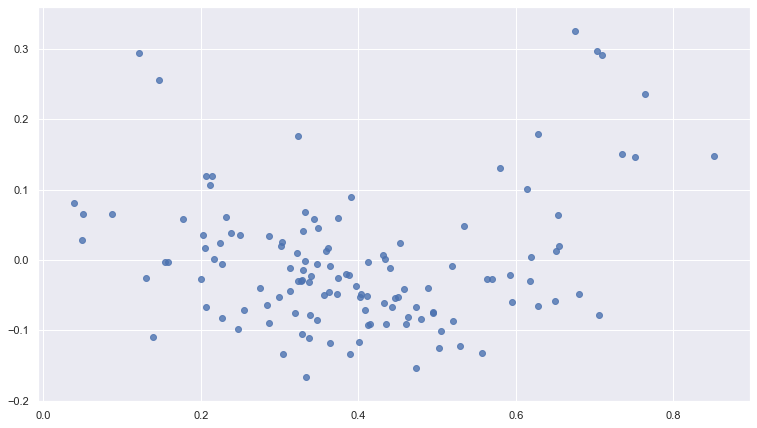

In [124]:
residuals=test_y_scaled - predict_y
sns.regplot(x=predict_y,y=residuals,fit_reg=False);